# Author :- Manish Dhamjewar

## Task 1 :- Prediction using Supervised ML

### To Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading the dataset
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Checking the datatype of variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
# Checking if there is any null value in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
# By Using describe() method we can able to see count,mean,std,min,percentiles,max of the given dataset 
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualize the data by plotting graph

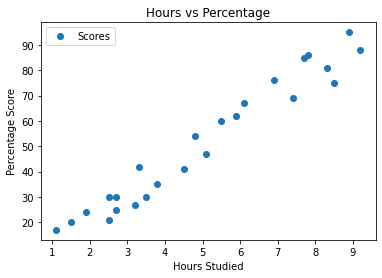

In [6]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### From the above scatter plot, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Preparing the data

In [8]:
# dividing the data into "attributes" (inputs) and "labels" (outputs).
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [9]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [11]:
# Now that we have our attributes and labels, the next step is to split this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)   

In [12]:
# Checking the train and test size of data
print("X_train size =", X_train.shape)
print("Y_train size =", y_train.shape)
print("X_test size =", X_test.shape)
print("X_test size =", y_test.shape)

X_train size = (20, 1)
Y_train size = (20,)
X_test size = (5, 1)
X_test size = (5,)


### Training the algorithm

### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  

In [14]:
# Fitting the training data
linreg.fit(X_train, y_train)

LinearRegression()

In [15]:
# print the calculated intercept and slope
print("Intercept b0 =", linreg.intercept_)
print("Slope b1 =", linreg.coef_)

Intercept b0 = 2.0181600414346974
Slope b1 = [9.91065648]


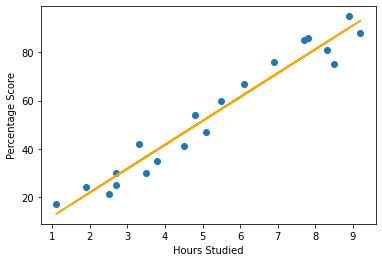

In [16]:
# Plotting the regression line
line = linreg.coef_*X + linreg.intercept_

# Plotting for the train data
plt.scatter(X_train, y_train)
plt.plot(X, line, color='orange');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

### Making Predictions

In [17]:
# Predicting the scores
y_pred = linreg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Actual and Predicted value

In [18]:
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df 

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Visualizing the Actual and Predicted value

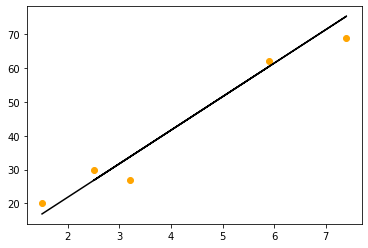

In [19]:
plt.scatter(X_test, y_test , color = "orange")
plt.plot(X_test, y_pred , color = "black")
plt.show()

### Evaluating the model

In [20]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Square Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2_Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Square Error: 21.598769307217406
R2_Score: 0.9454906892105355


### Small value of Mean Absolute Error states that the chances of error or wrong forecasting through the model are very less

### What will be predicted score if a student studies for 9.25 hrs/day?

In [21]:
hours = [9.25]
predicted_score = linreg.predict([hours])
print("Score = {}".format(predicted_score[0]))

Score = 93.69173248737535


### According to the regression model, if a student studies for 9.25 hrs/day then he/she is likely to score 93.69 marks.